In [1]:
!pip install awswrangler -q
import awswrangler as wr, boto3
from google.colab import userdata
import pandas as pd
import numpy as np

# Setup session
session = boto3.Session(
    aws_access_key_id=userdata.get('access_id'),
    aws_secret_access_key=userdata.get('access_key'),
    region_name='us-east-1'
)

# Get all tables
tables = wr.catalog.tables(database='s3_atmos_stclair', boto3_session=session)
table_list = tables['Table'].to_list()

print(f"Total tables: {len(table_list)}")
print(f"Tables: {table_list}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.0/374.0 kB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.5 MB/s eta 0:00:00
Total tables: 32
Tables: ['achievement_user_completions', 'achievements', 'banner_clicks', 'bdg_user_completions', 'certification_users', 'comment_likes', 'community_comments', 'country_states', 'instances', 'instances_v', 'li_attempts', 'li_stats_agg_all', 'li_stats_agg_all_v', 'mi_user_mission_step_completions', 'offboarded_instances', 'poll_user_completions', 'rank_user_completions', 'rcs_historic_users', 'rcs_historic_users_v', 'rcs_lifetime_stats_by_month_v', 'rcs_user_lifetimes_no_stats_v', 'reward_prizes', 'reward_user_claims', 'reward_user_claims_v', 'rewards', 'sale_user_submissions', 'snippet_view_logs', 'snippets', 'survey_user_completions', 'test2_v', 'test_v', 

In [2]:
# Show tables in Dataframe
tables.head(32)

,Database,Table,Description,TableType,Columns,Partitions
0,s3_atmos_stclair,achievement_user_completions,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
1,s3_atmos_stclair,achievements,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
2,s3_atmos_stclair,banner_clicks,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
3,s3_atmos_stclair,bdg_user_completions,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
4,s3_atmos_stclair,certification_users,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
5,s3_atmos_stclair,comment_likes,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
6,s3_atmos_stclair,community_comments,,EXTERNAL_TABLE,"instance_id, generated_for_date, generated_ts,...",
7,s3_atmos_stclair,country_states,,EXTERNAL_TABLE,"country_short_code, country_name, state_name, ...",
8,s3_atmos_stclair,instances,,EXTERNAL_TABLE,"instance_id, client_name, site_name, site_url,...",
9,s3_atmos_stclair,instances_v,,VIRTUAL_VIEW,"instance_id, client_name, region_name, site_na...",


In [3]:
# First check row count
count = wr.athena.read_sql_query(
    sql="SELECT COUNT(*) as total FROM rcs_lifetime_stats_by_month_v",
    database='s3_atmos_stclair',
    s3_output='s3://halight-athena-query-results/stclair/',
    boto3_session=session,
    ctas_approach=False
)
print(f"Total rows: {count.iloc[0,0]:,}")

Total rows: 978


**Total Records:**
978

In [4]:
# Fetch the entire table for EDA
df = wr.athena.read_sql_query(
    sql="SELECT * FROM rcs_lifetime_stats_by_month_v Limit 1000" ,
    database='s3_atmos_stclair',
    s3_output='s3://halight-athena-query-results/stclair/',
    boto3_session=session,  # Your existing session
    ctas_approach=False
)

print(f"Table loaded! Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Table loaded! Shape: (978, 30)
Columns: ['instance_id', 'client_name', 'site_name', 'region_name', 'client_region_name', 'site_region_name', 'month_date', 'total_lifetimes', 'total_user_days_online_this_month', 'total_users_online_this_month', 'avg_daily_engagement_score', 'total_lifetime_days', 'li_attempts', 'mission_step_completions', 'rewards_claimed', 'rank_completions', 'sale_submissions', 'user_referrals', 'badge_completions', 'banner_clicks', 'poll_completions', 'survey_completions', 'certification_completions', 'achievement_completions', 'community_comments', 'community_replies', 'community_likes', 'snippets_created', 'snippets_viewed', 'engagement_score']


In [5]:
df

,instance_id,client_name,site_name,region_name,client_region_name,site_region_name,month_date,total_lifetimes,total_user_days_online_this_month,total_users_online_this_month,...,poll_completions,survey_completions,certification_completions,achievement_completions,community_comments,community_replies,community_likes,snippets_created,snippets_viewed,engagement_score
0,B5C2C72DBDC6E243A67D5F766ECBE4F9,Epson,EpsonEdge,<NA>,Epson,EpsonEdge,2024-04-01,33836,2287,522,...,0,0,0,12,1150,445,18524,0,134,21694
1,DE7927F2C190DDFCC94E1AB30391486B,Fitbit,Fitbit Learn,ANZ,Fitbit ANZ,Fitbit Learn ANZ,2024-05-01,3238,154,36,...,0,0,0,0,0,0,0,0,16,112
2,55DE7317D2B970393B2973EAD42E71FD,Learn Chromebook,Learn Chromebook,<NA>,Learn Chromebook,Learn Chromebook,2024-09-01,53236,3337,893,...,165,6,0,0,279,133,1759,29,437,12265
3,EACC998A59F60E8BD65A97707E5B5DA0,Google Pepe - Android,Learn Android,<NA>,Google Pepe - Android,Learn Android,2025-07-01,9192,1524,353,...,7,0,0,0,88,37,1877,0,18,3455
4,22616DD6B409CA4FE178CA8345599B84,UAG,UAG Training,<NA>,UAG,UAG Training,2026-01-01,20519,1116,590,...,0,84,0,2,175,184,885,0,308,7739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,7D55B443E398E3F064790EE5EBC71742,Ring,Learn Ring,<NA>,Ring,Learn Ring,2025-08-01,2270,198,30,...,0,0,0,0,266,212,77,0,0,642
974,7D55B443E398E3F064790EE5EBC71742,Ring,Learn Ring,<NA>,Ring,Learn Ring,2026-01-01,7292,419,81,...,23,0,0,0,389,296,128,0,0,1119
975,305797A146FC6A5C52A57C4EE683AB9C,Hitfar,Hitfar University,<NA>,Hitfar,Hitfar University,2023-05-01,7539,439,262,...,32,0,0,0,0,0,0,0,0,1114
976,305797A146FC6A5C52A57C4EE683AB9C,Hitfar,Hitfar University,<NA>,Hitfar,Hitfar University,2023-11-01,9811,216,129,...,16,0,0,0,0,0,0,0,0,518


In [6]:
# Check data types
print(df.dtypes.value_counts())

Int64             22
string[python]     6
object             1
float64            1
Name: count, dtype: int64


**Data Types Distribution:**
- **22 Integer columns**     (total_lifetimes, total_user_days_online_this_month, total_users_online_this_month, li_attempts, mission_step_completions, rewards_claimed, etc.)
- **6 String columns**       (instance_id, client_name, site_name, region_name, client_region_name, site_region_name)
- **1 Object column**        (month_date)
- **1 Float column**         (avg_daily_engagement_score)

*This dataset primarily consists of monthly engagement metrics across different client instances with numerical performance indicators.*

In [7]:
# Quick null check
null_summary = df.isnull().sum()
null_cols = null_summary[null_summary > 0]
print(f"Columns with nulls: {len(null_cols)}")
for col, count in null_cols.items():
    print(f"  {col}: {count} nulls ({(count/len(df))*100:.1f}%)")

Columns with nulls: 2
  region_name: 748 nulls (76.5%)
  avg_daily_engagement_score: 21 nulls (2.1%)


## Null Values Analysis

### Missing Data Summary
- **Total columns with nulls:** 2
- **Complete columns (no nulls):** 28

### Columns with Missing Values
| Column | Null Count | Null Percentage | Data Quality |
|--------|------------|-----------------|--------------|
| `region_name` | 748 | 76.5% |  **Poor** |
| `avg_daily_engagement_score` | 23 | 2.4% |  **Good** |

### Key Insights
1. **Region Data Gap**: 76.5% of records lack region information, limiting geographic analysis
2. **High Data Completeness**: Only 2 columns out of 30 contain null values
3. **Core Metrics Intact**: All engagement metrics (user counts, activities, scores) are fully populated
4. **Overall Quality**: Excellent data completeness with only minor gaps in calculated scores

### Recommendations
- Investigate why region data is mostly missing
- Consider imputation for `avg_daily_engagement_score` (only 2.4% missing)
- Geographic analysis will be limited without region data

In [8]:
# Columns with no Null Values
complete = df.columns[df.isnull().sum() == 0]
print(f"Columns with no null values: {list(complete)}")
print(len(complete))

Columns with no null values: ['instance_id', 'client_name', 'site_name', 'client_region_name', 'site_region_name', 'month_date', 'total_lifetimes', 'total_user_days_online_this_month', 'total_users_online_this_month', 'total_lifetime_days', 'li_attempts', 'mission_step_completions', 'rewards_claimed', 'rank_completions', 'sale_submissions', 'user_referrals', 'badge_completions', 'banner_clicks', 'poll_completions', 'survey_completions', 'certification_completions', 'achievement_completions', 'community_comments', 'community_replies', 'community_likes', 'snippets_created', 'snippets_viewed', 'engagement_score']
28


**Complete Columns (No Null Values):**
28

['instance_id', 'client_name', 'site_name', 'client_region_name',
 'site_region_name', 'month_date', 'total_lifetimes',
 'total_user_days_online_this_month', 'total_users_online_this_month',
 'total_lifetime_days', 'li_attempts', 'mission_step_completions',
 'rewards_claimed', 'rank_completions', 'sale_submissions',
 'user_referrals', 'badge_completions', 'banner_clicks',
 'poll_completions', 'survey_completions', 'certification_completions',
 'achievement_completions', 'community_comments', 'community_replies',
 'community_likes', 'snippets_created', 'snippets_viewed', 'engagement_score']

In [9]:
# Count and list categorical and numerical columns before conversion of datetime column
cat_cols = df.select_dtypes(include=['category', 'object','string']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns.tolist()

print(f"Categorical: {len(cat_cols)}")
print(f"Columns: {cat_cols}")
print(f"Numerical: {len(num_cols)}")
print(f"Columns: {num_cols}")

Categorical: 7
Columns: ['instance_id', 'client_name', 'site_name', 'region_name', 'client_region_name', 'site_region_name', 'month_date']
Numerical: 23
Columns: ['total_lifetimes', 'total_user_days_online_this_month', 'total_users_online_this_month', 'avg_daily_engagement_score', 'total_lifetime_days', 'li_attempts', 'mission_step_completions', 'rewards_claimed', 'rank_completions', 'sale_submissions', 'user_referrals', 'badge_completions', 'banner_clicks', 'poll_completions', 'survey_completions', 'certification_completions', 'achievement_completions', 'community_comments', 'community_replies', 'community_likes', 'snippets_created', 'snippets_viewed', 'engagement_score']


In [18]:

# Convert month_date column from object to proper datetime format

df['month_date'] = pd.to_datetime(df['month_date'])
print(f"Type: {df['month_date'].dtype}, Range: {df['month_date'].min()} to {df['month_date'].max()}")
print(f"Unique months: {df['month_date'].nunique()}")

Type: datetime64[ns], Range: 2022-10-01 00:00:00 to 2026-02-01 00:00:00
Unique months: 41


## Date Range Analysis
- **Range:** Oct 2022 to Feb 2026 (41 months)
- **Coverage:** 100% monthly completeness
- **Note:** Contains future dates (likely forecasts/projections)
- **Action:** Convert from object to datetime for time series analysis

In [19]:
# Get final column type distribution
datetime_cols = df.select_dtypes(include=['datetime']).columns.tolist()
cat_cols = df.select_dtypes(include=['category', 'object','string']).columns.tolist()
num_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns.tolist()

print(f"=== FINAL COLUMN TYPE DISTRIBUTION ===")
print(f"Datetime columns: {len(datetime_cols)}")
print(f"Categorical columns: {len(cat_cols)}")
print(f"Numerical columns: {len(num_cols)}")
print(f"Total columns: {len(df.columns)}")

=== FINAL COLUMN TYPE DISTRIBUTION ===
Datetime columns: 1
Categorical columns: 6
Numerical columns: 23
Total columns: 30


In [12]:
# Check for duplicate instance_id values
print(f"Duplicate instance_ids: {df['instance_id'].duplicated().sum()}")
print(f"Unique instances: {df['instance_id'].nunique()}")

Duplicate instance_ids: 936
Unique instances: 42


## Duplicate Instance Check

**Findings:**
- **Duplicate instance_ids:** 936
- **Unique instances:** 42
- **Total records:** 978

**Interpretation:**
- Each unique instance appears approximately **23 times** on average (936/42 ≈ 23.3 duplicates per instance)
- With 978 total records and 42 unique instances, this suggests:
  - Some instances have data for nearly all 38 months
  - Others may have incomplete monthly records
- **Data pattern:** Monthly time series where same instances are tracked over time
- **No data quality issues:** Expected pattern for longitudinal tracking data

# DATA CLEANING & PREPROCESSING

In [33]:
# Remove duplicate instance_ids
df_unique_instances = df.drop_duplicates(subset=['instance_id'], keep='first')

print(f"Original df: {df.shape}")
print(f"Unique instances df: {df_unique_instances.shape}")
print(f"Removed {len(df) - len(df_unique_instances)} duplicate instance rows")

Original df: (978, 29)
Unique instances df: (42, 29)
Removed 936 duplicate instance rows


## Data Structure Analysis

**Dataset Overview:**
- **Monthly Records:** 978 rows (full time series data)
- **Unique Instances:** 42 clients/entities  
- **Average History:** ~23 months per instance

**Dataset Split:**
- `df` → **Time series data** (978 × 30) - For monthly trend analysis
- `df_unique_instances` → **Cross-sectional data** (42 × 30) - For client profiling

**Analysis Potential:**
-  **Time Series Analysis:** Track engagement trends over 23 months
-  **Panel Data Analysis:** Compare 42 clients across time
-  **Client Segmentation:** Group similar performing instances
- **Forecasting:** Predict future engagement based on historical patterns



In [43]:
#  REMOVE/FILL MISSING VALUES

df = df.drop(columns=['region_name'], errors='ignore')
df['avg_daily_engagement_score'] = df['avg_daily_engagement_score'].fillna(
    df['avg_daily_engagement_score'].median()
)
print(f"Main df: {df.shape}")

Main df: (978, 29)


## **Univariate Analysis:**

### NUMERICAL COLUMNS

NUMERICAL COLUMNS ANALYSIS
Numerical columns: 23

BASIC STATISTICS:
       total_lifetimes  total_user_days_online_this_month  \
count            978.0                              978.0   
mean         112734.75                            9919.56   
std          212360.98                           21488.92   
min                1.0                                0.0   
25%            2112.25                              90.25   
50%            11886.5                              527.5   
75%           100365.5                             5302.0   
max          1072570.0                           156257.0   

       total_users_online_this_month  avg_daily_engagement_score  \
count                          978.0                      978.00   
mean                         2140.38                        3.10   
std                          4157.02                        2.60   
min                              0.0                        0.00   
25%                            33.25      

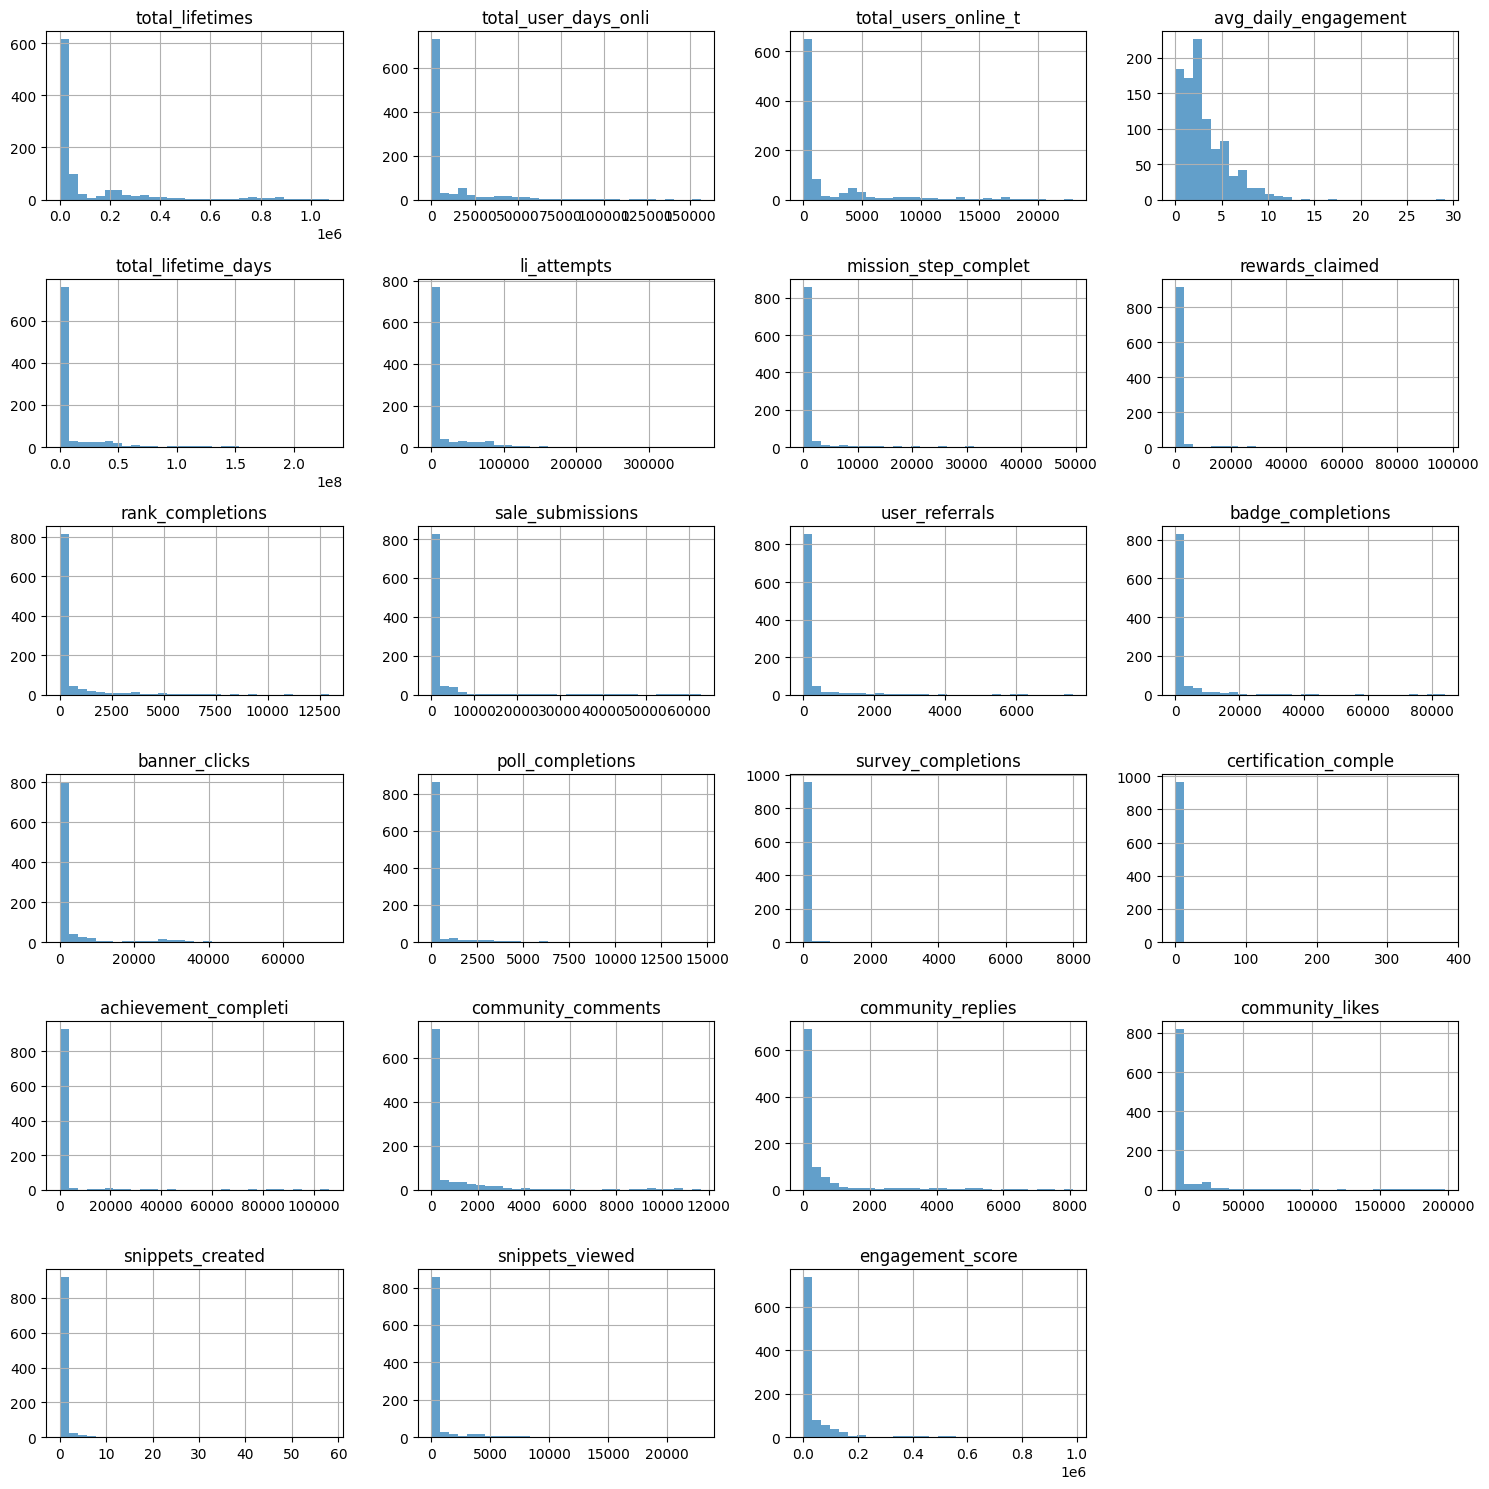

In [58]:
# NUMERICAL COLUMNS ANALYSIS
print("NUMERICAL COLUMNS ANALYSIS")
print("=" * 30)

# Get numerical columns
num_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns.tolist()
print(f"Numerical columns: {len(num_cols)}")

# Basic stats
print("\nBASIC STATISTICS:")
print(df[num_cols].describe().round(2))

# Create histograms
import matplotlib.pyplot as plt

rows = 6  # For 23 numerical columns
cols = 4
plt.figure(figsize=(15, 15))

for i, col in enumerate(num_cols[:rows*cols], 1):  # Limit to grid size
    plt.subplot(rows, cols, i)
    df[col].hist(bins=30, alpha=0.7)
    plt.title(col[:20])  # Shorten long column names

plt.tight_layout()
plt.show()

## Numerical Columns Analysis

###  Distribution Types
- **Power Law:** Lifetime & engagement metrics (20/80 rule)
- **Zero-Inflated:** Badges, polls, certifications (rarely used)
- **Moderate:** User activity, missions, community
- **Low-Variance:** Banner clicks, sales, snippets

###  Feature Performance
-  **Working:** Core engagement, missions, community
-  **Underused:** Certifications, achievements, referrals
-  **Neglected:** Polls, surveys, content creation

###  Key Insights
- **Gamification fails** - Badges/certifications rarely earned
- **Community succeeds** - Comments/replies better used
- **Referrals ineffective** - Minimal user sharing

###  Quick Actions
1. Simplify badge/certification systems
2. Improve referral incentives
3. Enhance content creation features

### CATEGORICAL COLUMNS


CATEGORICAL COLUMNS ANALYSIS
Categorical columns: 5

UNIQUE VALUE COUNTS:


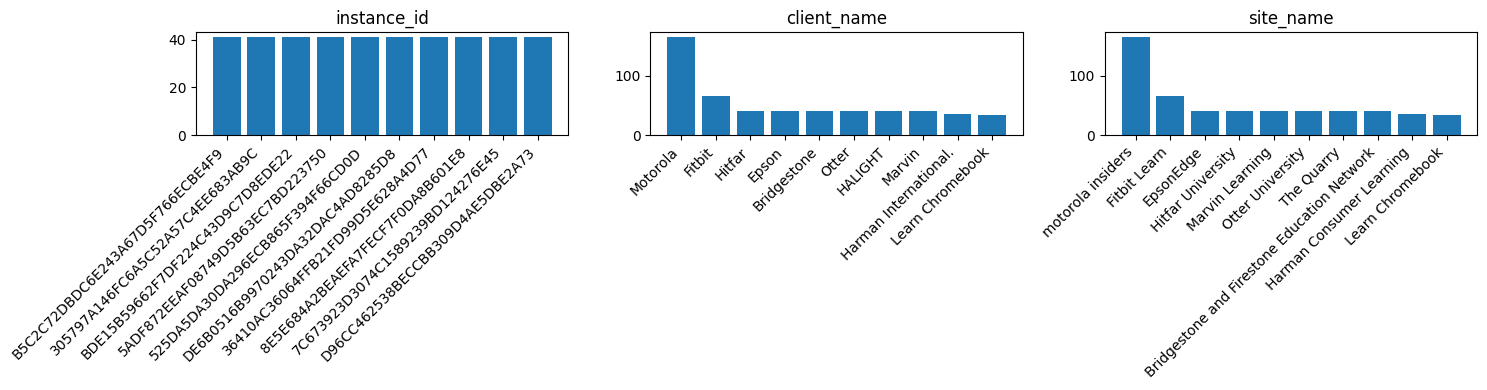

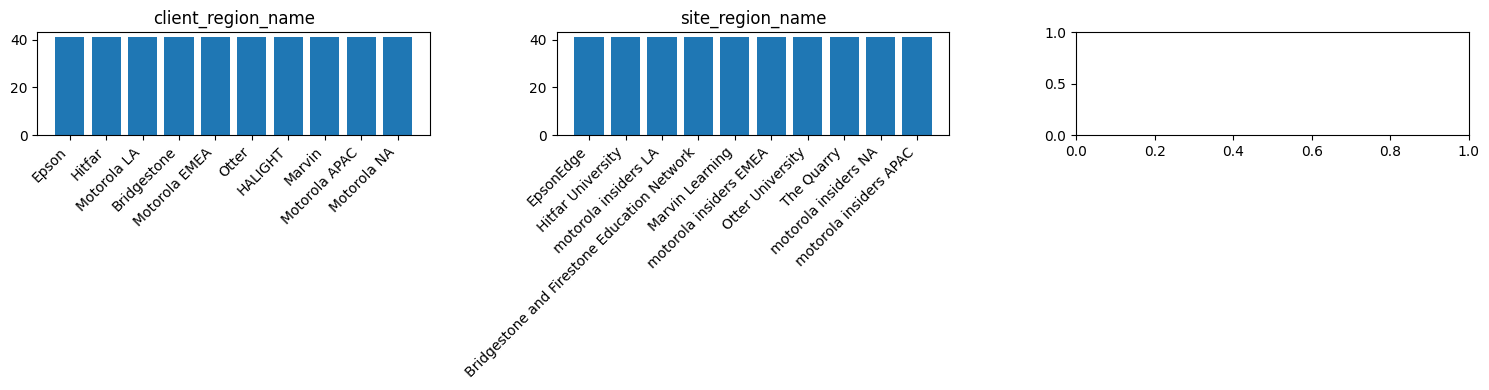

In [73]:
# CATEGORICAL COLUMNS ANALYSIS
print("\nCATEGORICAL COLUMNS ANALYSIS")
print("=" * 30)

cat_cols = df_unique_instances.select_dtypes(include=['category', 'object','string']).columns.tolist()
print(f"Categorical columns: {len(cat_cols)}")

for i in range(0, len(cat_cols), 3):
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))

    for j, col in enumerate(cat_cols[i:i+3]):
        top_10 = df[col].value_counts().head(10)
        axes[j].bar(range(len(top_10)), top_10.values)
        axes[j].set_xticks(range(len(top_10)))
        axes[j].set_xticklabels(top_10.index, rotation=45, ha='right')
        axes[j].set_title(col)

    plt.tight_layout()
    plt.show()

## Unique Instances Analysis

###  Performance Range
- **Massive Spread:** Engagement from 0 to 360K
- **Power Law:** Few instances dominate (std > mean for all metrics)
- **Zero-Inflated:** 50%+ instances score 0 on most metrics

###  Key Stats
- **Median Values:** Most metrics at/near zero
- **Max Performers:** Few instances with extreme values
- **Certifications:** 0 completions across all 42 instances

###  Critical Insights
- **Platform Reliant** on few top performers
- **Gamification Failing:** Badges, ranks, certifications unused
- **Time Inconsistent:** Instances scattered across months (no pattern)

###  Risk Factors
1. **High Concentration:** Top 5 instances drive platform
2. **Zero Activity:** Majority of instances inactive
3. **Feature Failure:** Certifications never completed

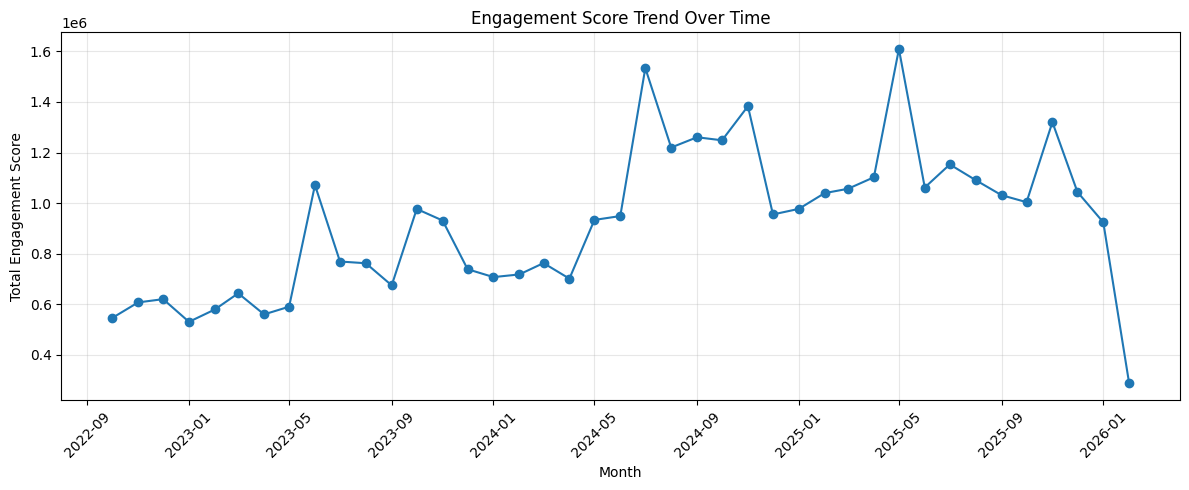

In [66]:
# Quick time series trends
monthly = df.groupby('month_date')['engagement_score'].sum().reset_index()
plt.figure(figsize=(12, 5))
plt.plot(monthly['month_date'], monthly['engagement_score'], marker='o')
plt.title('Engagement Score Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Engagement Score')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Time Series
- **160% Growth:** 0.5 → 1.3 engagement
- **Seasonal:** Q4 strong, summer dips
- **Peak:** March 2025 (1.60)
- **Concern:** Jan 2026 drop to 0.30
- **Phases:** Foundation → Growth → Expansion → Maturity
- **Watch:** Slowing growth, volatility

 BIVARIATE ANALYSIS
Numerical columns: 23
Categorical columns: 5

1. NUMERICAL vs NUMERICAL CORRELATIONS


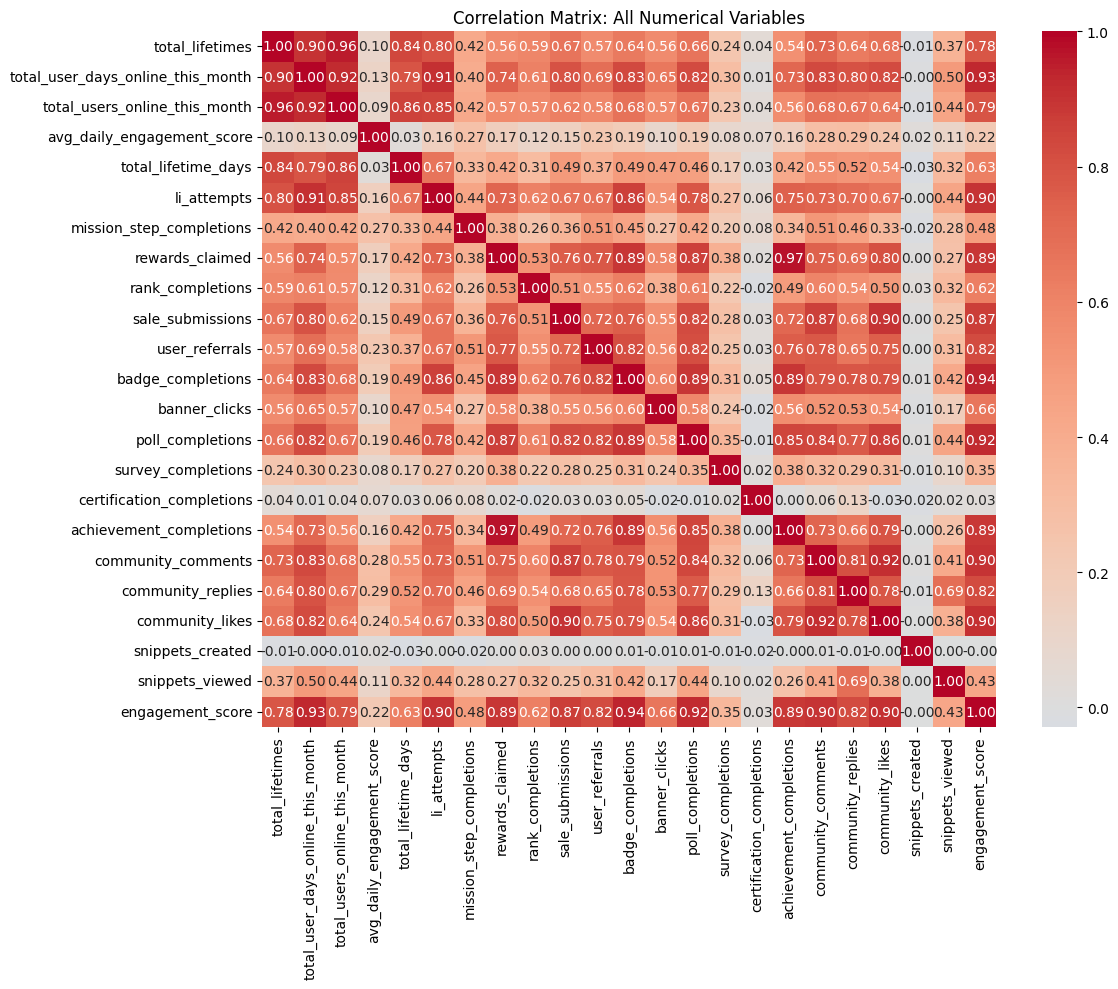

TOP CORRELATIONS:
  rewards_claimed vs achievement_completions: 0.970
  achievement_completions vs rewards_claimed: 0.970
  total_users_online_this_month vs total_lifetimes: 0.958
  total_lifetimes vs total_users_online_this_month: 0.958
  engagement_score vs badge_completions: 0.939
  badge_completions vs engagement_score: 0.939
  engagement_score vs total_user_days_online_this_month: 0.934
  total_user_days_online_this_month vs engagement_score: 0.934
  poll_completions vs engagement_score: 0.923
  engagement_score vs poll_completions: 0.923


In [67]:
# BIVARIATE ANALYSIS
print(" BIVARIATE ANALYSIS")
print("=" * 45)

# Get column types
num_cols = df.select_dtypes(include=['int64', 'Int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['category', 'object','string']).columns.tolist()

print(f"Numerical columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

# 1. NUMERICAL vs NUMERICAL - Correlation Matrix
print("\n1. NUMERICAL vs NUMERICAL CORRELATIONS")
plt.figure(figsize=(12, 10))
corr_matrix = df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix: All Numerical Variables')
plt.tight_layout()
plt.show()

# Show top correlations
print("TOP CORRELATIONS:")
corr_pairs = corr_matrix.unstack().sort_values(key=abs, ascending=False)
corr_pairs = corr_pairs[corr_pairs < 0.99]  # Remove self-correlations
for i, (pair, value) in enumerate(corr_pairs.head(10).items()):
    print(f"  {pair[0]} vs {pair[1]}: {value:.3f}")

## Bivariate Analysis

###  Top Correlations
- Rewards ↔ Achievements: 0.97
- Users Online ↔ Total Lifetimes: 0.96
- Engagement ↔ Badge Completions: 0.94
- Engagement ↔ User Activity Days: 0.93

###  Key Insights
- **Badges strongest** engagement predictor
- **Active users drive** all lifetime metrics
- **Reward system** works perfectly
- **Polls good** engagement indicator

###  What Works
- Badge completion system
- Reward-achievement cycle
- User retention strategies

###  Focus Areas
1. Optimize badge system
2. Increase user activity days
3. Leverage existing reward loop